# ORDerly args decisions

In [16]:
# imports
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

## Experimentation

In [7]:
path = '/Users/dsw46/Projects_local/ORDerly/data/orderly/unfiltered/uspto_no_trust/orderly_ord.parquet'
df = pd.read_parquet(path)

In [8]:
def columns_start_with(df, prefix):
    return [col for col in df.columns if col.startswith(prefix)] # e.g. "agent", "solvent", "reagent", "catalyst"

In [13]:
def count_strings(df):
    string_counts = []
    for col in tqdm(df.columns):
        count = df[col].apply(lambda x: isinstance(x, str)).sum()
        string_counts.append(count)
    return string_counts

In [14]:
reactant_cols = columns_start_with(df, 'reactant')
reactant_df = df[reactant_cols]
reactant_counts = count_strings(reactant_df)

100%|██████████| 100/100 [00:22<00:00,  4.49it/s]


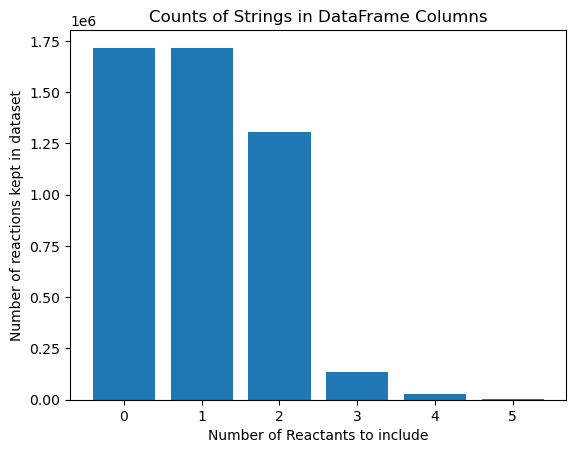

In [21]:
reactant_plot_list = reactant_counts[:5]
reactant_plot_list = [len(df)] + reactant_plot_list
# create a bar plot of string counts for each column
plt.bar(range(len(reactant_plot_list)), reactant_plot_list)

# set the x-axis tick labels to the column names
#plt.xticks(range(len(reactant_counts)), rotation=90)

# set the plot title and axis labels
plt.title('Counts of Strings in DataFrame Columns')
plt.xlabel('Number of Reactants to include')
plt.ylabel('Number of reactions kept in dataset')

# display the plot
plt.show()


## Writing a class

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

class StringCountsPlotter:
    def __init__(self, df, col_starts_with, figure_file_path):
        self.df = df
        self.col_starts_with = col_starts_with
        self.figure_file_path = figure_file_path
        self.string_counts = None
        self.columns_to_plot = None
        
    def _get_columns_to_plot(self):
        cols = [col for col in self.df.columns if col.startswith(self.col_starts_with)]

        return cols
    
    def _count_strings(self, df):
        string_counts = []
        for col in tqdm(df.columns):
            count = df[col].apply(lambda x: isinstance(x, str)).sum()
            string_counts.append(count)
        return string_counts
    
    def plot_string_counts(self):
        # clear the figure
        plt.clf()
        col_subset = self._get_columns_to_plot()
        df_subset = self.df[col_subset]
        counts = self._count_strings(df_subset)
        counts = [len(self.df)] + counts
        
        plotting_subset = counts[:10]
        # create a bar plot of string counts for each column
        plt.bar(range(len(plotting_subset)), plotting_subset)

        # set the x-axis tick labels to the column names
        #plt.xticks(range(len(self.columns_to_plot)), self.columns_to_plot, rotation=90)

        # set the plot title and axis labels
        plt.title(f'Counts of Strings in DataFrame Columns starting with "{self.col_starts_with}"')
        plt.ylabel('Number of reactions kept in dataset')
        plt.xlabel(f'Number of {self.col_starts_with} to include')

        # save the plot to file
        plt.savefig(self.figure_file_path, bbox_inches='tight')


100%|██████████| 100/100 [00:22<00:00,  4.49it/s]


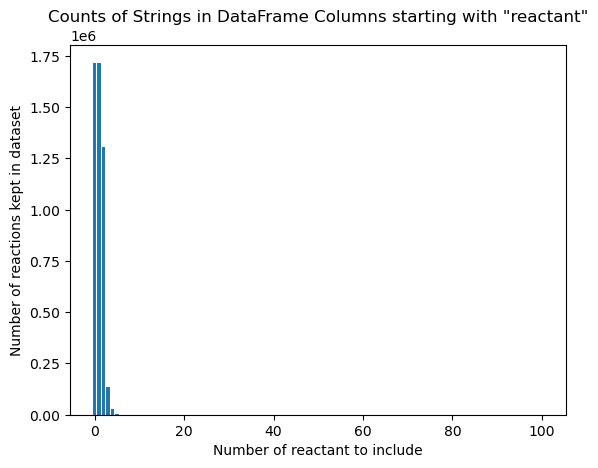

In [32]:
instance = StringCountsPlotter(df, 'reactant', '/Users/dsw46/Projects_local/ORDerly/notebooks/reactant_counts.png')
instance.plot_string_counts()

100%|██████████| 100/100 [00:22<00:00,  4.53it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 100/100 [00:22<00:00,  4.54it/s]


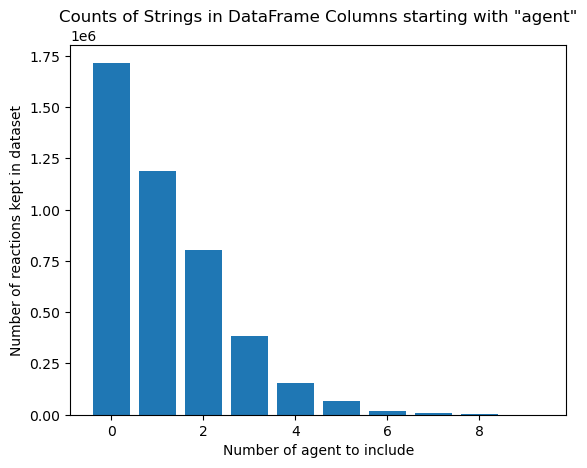

In [36]:
for molecule in ['reactant', 'product', 'solvent', 'catalyst', 'reagent', 'agent']:
    instance = StringCountsPlotter(df, molecule, f'/Users/dsw46/Projects_local/ORDerly/data/orderly/unfiltered/uspto_no_trust/plots/{molecule}_counts.png')
    instance.plot_string_counts()

In [ ]:
expected_filtered_df['reactant_002']

In [ ]:
filtered_df['reactant_002']

In [2]:
import pandas as pd
df = pd.read_parquet('/Users/dsw46/Downloads/cleaned orderly data copies/unfiltered/uspto_no_trust/orderly_ord.parquet')

In [3]:
df.head()

agent_000 agent_001 agent_002 agent_003 agent_004 agent_005 agent_006   
0      <NA>      <NA>      <NA>      <NA>      <NA>      <NA>      <NA>  \
1      <NA>      <NA>      <NA>      <NA>      <NA>      <NA>      <NA>   
2      <NA>      <NA>      <NA>      <NA>      <NA>      <NA>      <NA>   
3      [Fe]     [Na+]     [OH-]      <NA>      <NA>      <NA>      <NA>   
4      <NA>      <NA>      <NA>      <NA>      <NA>      <NA>      <NA>   

  agent_007 agent_008 agent_009  ... yield_090 yield_091 yield_092 yield_093   
0      <NA>      <NA>      <NA>  ...      None      None      None      None  \
1      <NA>      <NA>      <NA>  ...      None      None      None      None   
2      <NA>      <NA>      <NA>  ...      None      None      None      None   
3      <NA>      <NA>      <NA>  ...      None      None      None      None   
4      <NA>      <NA>      <NA>  ...      None      None      None      None   

  yield_094 yield_095 yield_096 yield_097 yield_098 yield_099  
0      None      None      None      None      None      None  
1      None      None      None      None      None      None  
2      None      None      None      None      None      None  
3      None      None      None      None      None      None  
4      None      None      None      None      None      None  

[5 rows x 508 columns]

In [5]:
type(df.iloc[0]['reactant_002'])

pandas._libs.missing.NAType

# Implement scramble function

In [1]:
import numpy as np
import pandas as pd

In [2]:
def _scramble(df: pd.DataFrame) -> pd.DataFrame:
        """Scrambles the order of the reactants (ie between reactant_001, reactant_002, etc). Ordering of prodcuts, agents, solvents, reagents, and catalysts will also be scrambled. Will also scramble the reaction indices. This is done to prevent the model from learning the order of the molecules, which is not important for the reaction prediction task. It only done at the very end because scrambling can be non-deterministic between versions/operating systems, so it would be difficult to debug if done earlier in the pipeline."""
        """Scrambles the order of the reactants and other components in the DataFrame."""
        df = df.copy()  # Create a copy of the DataFrame to avoid modifying the original DataFrame
        
        # Scramble reactants
        reactant_columns = [col for col in df.columns if col.startswith('reactant_')]
        reactant_indices = np.arange(len(reactant_columns))
        np.random.shuffle(reactant_indices)
        reactant_columns_scrambled = [f'reactant_{str(idx).zfill(3)}' for idx in reactant_indices]
        df = df[reactant_columns_scrambled + [col for col in df.columns if not col.startswith('reactant_')]]
        
        # Scramble other components (products, agents, solvents, reagents, catalysts)
        other_columns = [col for col in df.columns if not col.startswith('reactant_')]
        np.random.shuffle(other_columns)
        df = df[reactant_columns_scrambled + other_columns]
        
        # Scramble reaction indices
        df = df.sample(frac=1).reset_index(drop=True)
        
        return df

In [2]:
toy_dict = {
        "reactant_000": ["B", "A", "F", "A"],
        "reactant_001": ["D", "A", pd.NA, "B"],
        "product_000": ["C", "A", "E", "A"],
        "product_001": ["E", "G", "C", "H"],
        "agent_000": ["D", "F", "D", "B"],
        "agent_001": ["C", "E", "G", "A"],
        "solvent_000": ["E", "B", "G", "C"],
        "solvent_001": ["C", "D", "B", "G"],
        "solvent_002": ["D", "B", "F", "G"],
    }
toy_df = pd.DataFrame(toy_dict)

In [3]:
df2 = _scramble(toy_df)

NameError: name '_scramble' is not defined

In [4]:
df2

NameError: name 'df2' is not defined

In [5]:
toy_df

reactant_000 reactant_001 product_000 product_001 agent_000 agent_001  \
0            B            D           C           E         D         C   
1            A            A           A           G         F         E   
2            F         <NA>           E           C         D         G   
3            A            B           A           H         B         A   

  solvent_000 solvent_001 solvent_002  
0           E           C           D  
1           B           D           B  
2           G           B           F  
3           C           G           G

In [6]:
df = toy_df.copy()

In [7]:
df

reactant_000 reactant_001 product_000 product_001 agent_000 agent_001  \
0            B            D           C           E         D         C   
1            A            A           A           G         F         E   
2            F         <NA>           E           C         D         G   
3            A            B           A           H         B         A   

  solvent_000 solvent_001 solvent_002  
0           E           C           D  
1           B           D           B  
2           G           B           F  
3           C           G           G

In [14]:
def shuffle_columns(df: pd.DataFrame) -> pd.DataFrame:
    shuffled_df = df.copy()
    for _, series in shuffled_df.iterrows():
        np.random.shuffle(series.values)
    return shuffled_df

In [15]:
shuffle_columns(df[['reactant_000', 'reactant_001']])

reactant_000 reactant_001
0            D            B
1            A            A
2            F         <NA>
3            B            A

# Check that scramble works as intended

In [1]:
import pandas as pd

In [2]:
false = pd.read_parquet('/Users/dsw46/Projects_local/ORDerly/data/orderly/datasets/false/orderly_no_trust_no_map.parquet')
true = pd.read_parquet('/Users/dsw46/Projects_local/ORDerly/data/orderly/datasets/true/orderly_no_trust_no_map.parquet')

In [4]:
false.shape

(922880, 17)

In [6]:
false.iloc[0]

agent_000                                                           <NA>
agent_001                                                           <NA>
agent_002                                                           <NA>
date_of_experiment                                                   NaT
extracted_from_file         ord_dataset-a0eff6fe4b4143f284f0fc5ac503acad
grant_date                                           1976-01-01 00:01:00
is_mapped                                                           True
procedure_details      A mixture containing 12.5 ml. of 2-bromoethano...
product_000                                             CCS(=O)(=O)OCCBr
reactant_000                                               CCS(=O)(=O)Cl
reactant_001                                                       OCCBr
rxn_str                [Br:1][CH2:2][CH2:3][OH:4].[CH2:5]([S:7](Cl)(=...
rxn_time                                                             1.0
solvent_000                                        

In [7]:
true.size

0